# A Brief Introduction to Pandas
### Part 2

## 3.1 Selection
Using .loc(), .iloc()
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [201]:
# Read in the complete version of the europe data, using the first column as the index
eur_data_final = pd.read_csv('./data/complete/eur_data_final.csv', index_col=0)
eur_data_final.head()

,country,unemp_rate,gdp,median_income,total_pop
0,Austria,6.0,356237.6,23071,8401940
1,Belgium,7.8,424660.3,21335,11000638
2,Bulgaria,7.6,48128.6,6742,7364570
3,Croatia,13.1,46639.5,8985,4284889
4,Cyprus,13.0,18490.2,16173,840407


In [132]:
# Data from the eur_data_final df, represented as a python dictionary
countries_dict = {
    15: {
        'country': 'Italy', 
         'unemp_rate': 11.7, 
         'gdp': 1689824, 
         'median_income': 16237, 
         'total_pop': 59433744
        }
}

In [133]:
# With vanilla python, how do we get the word 'Italy' from a dictionary?
countries_dict[15]['country']

'Italy'

In [134]:
# How do we do this with a dataframe?
eur_data_final.loc[15, 'country']

'Italy'

In [136]:
# We can also get multiple columns
eur_data_final.loc[15, ['country', 'gdp']]

country              Italy
unemp_rate            11.7
gdp              1689824.0
median_income        16237
Name: 15, dtype: object

In [9]:
# Or an entire row/entry
eur_data_final.loc[12]

country           Hungary
unemp_rate            5.1
gdp              113903.8
median_income        8267
total_pop         9937628
Name: 12, dtype: object

In [10]:
# Or multiple rows and columns
eur_data_final.loc[[9,10], ['country','gdp']]

,country,gdp
9,France,2228568.0
10,Germany,3159750.0


In [137]:
# We can also use python's index slicing syntax
eur_data_final.loc[9:14, 'country':'median_income']

,country,unemp_rate,gdp,median_income
9,France,10.1,2228568.0,20621
10,Germany,4.1,3159750.0,21152
11,Greece,23.6,176487.9,9048
12,Hungary,5.1,113903.8,8267
13,Iceland,3.0,18646.1,22193
14,Ireland,8.4,273238.2,18286


In [11]:
# Select by column value (Pandas is smart!)
# DF must be indexed by country name
eur_data_country_index = eur_data_final.sort_values('country').set_index('country')
eur_data_country_index.loc['Slovenia']

unemp_rate             8.0
gdp                40357.2
median_income      15250.0
total_pop        2050189.0
Name: Slovenia, dtype: float64

### Exercise - Use .loc() to create a new dataframe with all countries from Cypress to France (alphabetically) with gdp and total_pop columns.

In [144]:
eur_data_country_index.loc['Cypress': 'France', ['gdp', 'total_pop']]

,gdp,total_pop
country,,
Cyprus,18490.2,840407
Czechia,176370.1,10436560
Denmark,282089.9,5560628
Estonia,21682.6,1294455
Finland,216073.0,5375276
France,2228568.0,64933400


### Exercise - What countries have a higher unemployment rate than Slovenia and have a lowercase 't' in their name?

In [20]:
# Select slovenia unemployment values
slovenia_unemployment = eur_data_country_index.loc['Slovenia', 'unemp_rate']
# Generate comparison query
gt_slov = eur_data_final.unemp_rate > slovenia_unemployment
# Generate 'contains' query
t_names = eur_data_final.country.str.contains('t')
# Make selection using queries
eur_data_final[gt_slov & t_names]

,country,unemp_rate,gdp,median_income,total_pop
3,Croatia,13.1,46639.5,8985,4284889
15,Italy,11.7,1689824.0,16237,59433744
16,Latvia,9.6,25037.7,9257,2070371
23,Portugal,11.2,186480.5,10805,10562178


In [14]:
# Explore .iloc()
# https://stackoverflow.com/questions/31593201/how-are-iloc-and-loc-different
eur_data_final.iloc[0]

country           Austria
unemp_rate            6.0
gdp              356237.6
median_income       23071
total_pop         8401940
Name: 0, dtype: object

## 4.1 MultiIndexes (hierarchical indexes)
Pandas also supports multindexes, which allow users to index by multiple values or groups of values.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html

In [5]:
parent_array = ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux']
child_array = ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']
arrays = [parent_array, child_array]

We want a multidimensional array of random numbers. Numpy for the win!

In [7]:
# Set the seed for number generation
np.random.seed(42)
# Create multidimensional array with shape 8,4
md_array = np.random.randint(10,size=(8,4))
md_array

array([[6, 3, 7, 4],
       [6, 9, 2, 6],
       [7, 4, 3, 7],
       [7, 2, 5, 4],
       [1, 7, 5, 1],
       [4, 0, 9, 5],
       [8, 0, 9, 2],
       [6, 3, 8, 2]])

In [10]:
# Convert md array to dataframe
multi_df = pd.DataFrame(md_array)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.RangeIndex.html
multi_df.index

RangeIndex(start=0, stop=8, step=1)

In [12]:
# Add multindex
multi_df = pd.DataFrame(md_array, index=arrays)
multi_df.index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           )

In [14]:
# Update column names of multi_df
multi_df.columns = ['var1', 'var2', 'var3', 'var4']

In [18]:
# Select all columns and rows for 'bar'
multi_df.loc['bar']

,var1,var2,var3,var4
one,6,3,7,4
two,6,9,2,6


In [34]:
# Select all rows for index foo and column var1
# Using loc, fancy indexing
multi_df.loc['foo', 'var1']
# # Using loc, bracket notation
# multi_df.loc['foo']['var1']
# # Using loc, dot notation
# multi_df.loc['foo'].var1
# # Without loc
# multi_df.var1.foo.one

one    1
two    4
Name: var1, dtype: int64

## 4.2 Groupby
From the documentation: "A groupby operation involves some combination of splitting the object, applying a function, and combining the results."
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

This is tied closely to the split-apply-combine strategy: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html. This was approach outlined by Hadley Wickcham in this paper: https://www.jstatsoft.org/article/view/v040i01.


In [204]:
# Read in the UN world data
un_data = pd.read_csv('./data/complete/un_world_data.csv')

This data is wide! Let's get rid of some of the columns.

In [38]:
# This data is wide! Let's get rid of some of the columns.
columns_to_keep = [
    'country',
    'Region',
    'Surface area (km2)',
    'GDP: Gross domestic product (million current US$)', 
    'Population in thousands (2017)', 
    'Population density (per km2, 2017)'
    ]
un_data = un_data[columns_to_keep]

In [43]:
# Rename the columns 
columns = {
    "Surface area (km2)": "surface_area", 
    "GDP: Gross domestic product (million current US$)": "gdp",
    "Population in thousands (2017)": 'population',
    "Population density (per km2, 2017)": 'population_density'
    }

un_data = un_data.rename(columns=columns)

In [202]:
# Group the data by region
un_region = un_data.groupby('Region', as_index=False)
# The groupby object is iterable
for region, region_df in un_region:
    print(region)
    print(region_df)

Note: generally speaking, you want to avoid iteration with Pandas. It's best to leverage the power of vectorized operations. If you find yourself looping through a dataframe or a series, you might be doing unecessary work. https://towardsdatascience.com/you-dont-always-have-to-loop-through-rows-in-pandas-22a970b347ac

In [203]:
# Select Caribbean group
carib = un_region.get_group('Caribbean')

# Get the head and tail
carib.head()
carib.tail()

,country,Region,surface_area,gdp,population,population_density
19,Dominican Republic,Caribbean,48671,67103,10767,222.8
27,Haiti,Caribbean,27750,8501,10981,398.4
59,Puerto Rico,Caribbean,8868,102906,3663,413.0
61,Saint Vincent and the Grenadines,Caribbean,389,738,110,281.8
82,Virgin Islands,Caribbean,347,-99,105,299.7


### Exercise - Get the average surface area of all the countries in CentralAmerica

In [46]:
central_america = un_region.get_group('CentralAmerica')
central_america['surface_area'].mean()

310819.5

We can do vectorized operations on each group object.

In [76]:
# .min(), .max(), .mean(), .count()
un_region.min()
un_region.max()
un_region.mean()
un_region.count()

,Region,surface_area,gdp,population,population_density
0,Caribbean,1.720500e+04,3.582980e+04,5125.200000,323.140000
1,CentralAmerica,3.108195e+05,1.712796e+05,22164.750000,104.262500
2,CentralAsia,1.712745e+05,7.212500e+03,7483.000000,47.600000
3,EasternAfrica,4.816671e+05,1.883158e+04,25645.750000,139.458333
4,EasternAsia,5.582058e+06,5.585108e+06,706296.500000,76.050000
5,EasternEurope,3.186730e+05,4.854500e+04,24137.000000,99.800000
6,Melanesia,2.054250e+04,9.060000e+02,443.500000,22.250000
7,Micronesia,5.490000e+02,-9.900000e+01,164.000000,304.100000
8,MiddleAfrica,1.054169e+06,2.482600e+04,36885.000000,34.066667
9,NorthernAfrica,1.002000e+06,3.159170e+05,97553.000000,98.000000


Let's take a look at aggregating the data using the .agg() method: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

In [85]:

# Get the mean of each column for each region
un_region.agg(['mean'])

,surface_area,gdp,population,population_density
,mean,mean,mean,mean
Region,,,,
Caribbean,1.720500e+04,3.582980e+04,5125.200000,323.140000
CentralAmerica,3.108195e+05,1.712796e+05,22164.750000,104.262500
CentralAsia,1.712745e+05,7.212500e+03,7483.000000,47.600000
EasternAfrica,4.816671e+05,1.883158e+04,25645.750000,139.458333
EasternAsia,5.582058e+06,5.585108e+06,706296.500000,76.050000
EasternEurope,3.186730e+05,4.854500e+04,24137.000000,99.800000
Melanesia,2.054250e+04,9.060000e+02,443.500000,22.250000
Micronesia,5.490000e+02,-9.900000e+01,164.000000,304.100000


In [86]:
# Get mean, median, and sum
un_region.agg(['mean', 'median', 'sum'])

surface_area                                gdp  \
                           mean     median       sum          mean   
Region                                                               
Caribbean          1.720500e+04     8868.0     86025  3.582980e+04   
CentralAmerica     3.108195e+05    92104.5   2486556  1.712796e+05   
CentralAsia        1.712745e+05   171274.5    342549  7.212500e+03   
EasternAfrica      4.816671e+05   589626.5   5780005  1.883158e+04   
EasternAsia        5.582058e+06  5582058.0  11164116  5.585108e+06   
EasternEurope      3.186730e+05   318673.0    637346  4.854500e+04   
Melanesia          2.054250e+04    20542.5     41085  9.060000e+02   
Micronesia         5.490000e+02      549.0       549 -9.900000e+01   
MiddleAfrica       1.054169e+06   475650.0   3162508  2.482600e+04   
NorthernAfrica     1.002000e+06  1002000.0   1002000  3.159170e+05   
NorthernAmerica    9.833517e+06  9833517.0   9833517  1.803665e+07   
Polynesia          2.842000e+03     2842.0      2842  7.740000e+02   
South-easternAsia  5.205436e+05   315483.5   4164349  2.298626e+05   
SouthAmerica       1.703150e+06   927341.5  13625203  3.327079e+05   
SouthernAfrica     6.918360e+05   824116.0   2075508  1.093567e+05   
SouthernAsia       9.843594e+05   652864.0   4921797  4.851398e+05   
SouthernEurope     2.874800e+04    28748.0     28748  1.154100e+04   
WesternAfrica      4.164142e+05   238537.0   4580556  5.688491e+04   
WesternAsia        2.060487e+05    78150.0   2060487  1.389109e+05   

                                            population                     \
                       median       sum           mean    median      sum   
Region                                                                      
Caribbean              8501.0    179149    5125.200000    3663.0    25626   
CentralAmerica        38991.0   1370237   22164.750000    6298.0   177318   
CentralAsia            7212.5     14425    7483.000000    7483.0    14966   
EasternAfrica         13530.0    225979   25645.750000   17858.0   307749   
EasternAsia         5585107.5  11170215  706296.500000  706296.5  1412593   
EasternEurope         48545.0     97090   24137.000000   24137.0    48274   
Melanesia               906.0      1812     443.500000     443.5      887   
Micronesia              -99.0       -99     164.000000     164.0      164   
MiddleAfrica          28416.0     74478   36885.000000   24054.0   110655   
NorthernAfrica       315917.0    315917   97553.000000   97553.0    97553   
NorthernAmerica    18036648.0  18036648  324460.000000  324460.0   324460   
Polynesia               774.0       774     196.000000     196.0      196   
South-easternAsia    127921.0   1838901   76377.250000   61204.5   611018   
SouthAmerica         145302.5   2661663   42953.250000   17340.0   343626   
SouthernAfrica        11491.0    328070   20494.666667    2534.0    61484   
SouthernAsia          20658.0   2425699  320367.800000   35530.0  1601839   
SouthernEurope        11541.0     11541    2930.000000    2930.0     2930   
WesternAfrica         11065.0    625734   30298.545455   15851.0   333284   
WesternAsia           43833.0   1389109   19296.700000    9012.0   192967   

                  population_density                  
                                mean  median     sum  
Region                                                
Caribbean                 323.140000  299.70  1615.7  
CentralAmerica            104.262500   74.60   834.1  
CentralAsia                47.600000   47.60    95.2  
EasternAfrica             139.458333   54.35  1673.5  
EasternAsia                76.050000   76.05   152.1  
EasternEurope              99.800000   99.80   199.6  
Melanesia                  22.250000   22.25    44.5  
Micronesia                304.100000  304.10   304.1  
MiddleAfrica               34.066667   35.90   102.2  
NorthernAfrica             98.000000   98.00    98.0  
NorthernAmerica            35.500000   35.50    35.5  
Polynesia    

We can also pass in other functions or define our own. These are referred to as higher-order functions, i.e. functions that take in other functions as arguments. 



In [101]:
# Example of higher-order function
def add_two(val):
    return val + 2

def do_calculation(val, func):
    return func(val)

def subtract_nine(val):
    return val - 9

do_calculation(12, add_two)
do_calculation(15, subtract_nine)

6

In [96]:
# Example of filtering
def is_nine(val):
    return val is not 9

values = [1, 2, 6, 9, 9, 11]
res = list(filter(is_nine, values))

[1, 2, 6, 11]

Let's use the statistics module from scipy to calculate some new values: https://docs.scipy.org/doc/scipy/reference/stats.html

In [100]:
# stats.tsem(), stats.tstd(), stats.skew()
un_region.agg([stats.tsem, stats.tstd, stats.skew])

surface_area                                   gdp  \
                           tsem          tstd      skew          tsem   
Region                                                                  
Caribbean          9.321432e+03  2.084335e+04  0.685299  2.091220e+04   
CentralAmerica     2.366682e+05  6.693987e+05  2.250712  1.387055e+05   
CentralAsia        2.867450e+04  4.055187e+04  0.000000  6.405000e+02   
EasternAfrica      9.050907e+04  3.135326e+05 -0.263652  5.318552e+03   
EasternAsia        4.017942e+06  5.682228e+06  0.000000  5.573349e+06   
EasternEurope      2.848270e+05  4.028062e+05  0.000000  4.207000e+04   
Melanesia          8.353500e+03  1.181363e+04  0.000000  1.690000e+02   
Micronesia                  NaN           NaN  0.000000           NaN   
MiddleAfrica       6.464966e+05  1.119765e+06  0.695791  8.583308e+03   
NorthernAfrica              NaN           NaN  0.000000           NaN   
NorthernAmerica             NaN           NaN  0.000000           NaN   
Polynesia                   NaN           NaN  0.000000           NaN   
South-easternAsia  2.110175e+05  5.968477e+05  1.783458  1.038262e+05   
SouthAmerica       9.847489e+05  2.785290e+06  2.162869  2.090794e+05   
SouthernAfrica     3.500259e+05  6.062627e+05 -0.381757  1.026437e+05   
SouthernAsia       5.934819e+05  1.327066e+06  1.284080  4.107010e+05   
SouthernEurope              NaN           NaN  0.000000           NaN   
WesternAfrica      1.298416e+05  4.306358e+05  0.995896  4.390537e+04   
WesternAsia        8.687679e+04  2.747285e+05  1.157696  7.048297e+04   

                                              population                 \
                           tstd      skew           tsem           tstd   
Region                                                                    
Caribbean          4.676111e+04  0.607884    2435.292270    5445.479061   
CentralAmerica     3.923185e+05  2.253862   15379.223415   43499.012664   
CentralAsia        9.058038e+02  0.000000    1438.000000    2033.639103   
EasternAfrica      1.842400e+04  1.434065    4595.949529   15920.836188   
EasternAsia        7.881906e+06  0.000000  703220.500000  994503.968439   
EasternEurope      5.949596e+04  0.000000   20086.000000   28405.893614   
Melanesia          2.390021e+02  0.000000     167.500000     236.880772   
Micronesia                  NaN  0.000000            NaN            NaN   
MiddleAfrica       1.486673e+04 -0.417756   22879.972909   39629.275555   
NorthernAfrica              NaN  0.000000            NaN            NaN   
NorthernAmerica             NaN  0.000000            NaN            NaN   
Polynesia                   NaN  0.000000            NaN            NaN   
South-easternAsia  2.936648e+05  1.333305   30201.355172   85422.332172   
SouthAmerica       5.913659e+05  2.125620   24368.804859   68925.388662   
SouthernAfrica     1.777841e+05  0.704844   18111.375103   31369.821873   
SouthernAsia       9.183553e+05  1.449172  257017.757855  574709.177989   
SouthernEurope              NaN  0.000000            NaN            NaN   
WesternAfrica      1.456176e+05  2.814527   16239.477886   53860.254939   
WesternAsia        2.228867e+05  1.993615    7749.004611   24504.504171   

                            population_density                        
                       skew               tsem        tstd      skew  
Region                                                                
Caribbean          0.215651          36.100853   80.723962  0.030881  
CentralAmerica     2.214198          32.501153   91.927144  1.489869  
CentralAsia        0.000000          16.100000   22.768838  0.000000  
EasternAfrica      0.939269          47.199301  163.503175  1.306365  
EasternAsia        0.000000          74.050000  104.722514  0.000000  
EasternEurope      0.000000          23.500000   33.234019  0.000000  
Melanesia          0.000000           0.450000    0.636396  0.000000  
Micronesia         0.000000                NaN     

In [102]:
# Use a lambda function
# https://www.geeksforgeeks.org/python-lambda-anonymous-functions-filter-map-reduce/

get_max = lambda x : x.max()
def get_max_alt(x):
    return x.max()

In [107]:
# Get the max of each column in each region
un_region.agg([get_max_alt])

,country,surface_area,gdp,population,population_density
,get_max_alt,get_max_alt,get_max_alt,get_max_alt,get_max_alt
Region,,,,,
Caribbean,Virgin Islands,48671,102906,10981,413.0
CentralAmerica,Panama,1964375,1140724,129163,307.8
CentralAsia,Tajikistan,199949,7853,8921,63.7
EasternAfrica,Zimbabwe,947303,63399,57310,494.9
EasternAsia,Mongolia,9600000,11158457,1409517,150.1
EasternEurope,Ukraine,603500,90615,44223,123.3
Melanesia,Vanuatu,28896,1075,611,22.7
Micronesia,Guam,549,-99,164,304.1


In [127]:
# Select a single column
un_region['surface_area'].agg([get_max_alt])

,get_max_alt
Region,
Caribbean,48671
CentralAmerica,1964375
CentralAsia,199949
EasternAfrica,947303
EasternAsia,9600000
EasternEurope,603500
Melanesia,28896
Micronesia,549
MiddleAfrica,2344858


In [159]:
# Get sum and mean of surface area, mean of population for each region
un_region.agg({'surface_area':['sum', 'mean'], 'population': 'mean'})

Region surface_area                   population
                               sum          mean           mean
0           Caribbean        86025  1.720500e+04    5125.200000
1      CentralAmerica      2486556  3.108195e+05   22164.750000
2         CentralAsia       342549  1.712745e+05    7483.000000
3       EasternAfrica      5780005  4.816671e+05   25645.750000
4         EasternAsia     11164116  5.582058e+06  706296.500000
5       EasternEurope       637346  3.186730e+05   24137.000000
6           Melanesia        41085  2.054250e+04     443.500000
7          Micronesia          549  5.490000e+02     164.000000
8        MiddleAfrica      3162508  1.054169e+06   36885.000000
9      NorthernAfrica      1002000  1.002000e+06   97553.000000
10    NorthernAmerica      9833517  9.833517e+06  324460.000000
11          Polynesia         2842  2.842000e+03     196.000000
12  South-easternAsia      4164349  5.205436e+05   76377.250000
13       SouthAmerica     13625203  1.703150e+06   42953.250000
14     SouthernAfrica      2075508  6.918360e+05   20494.666667
15       SouthernAsia      4921797  9.843594e+05  320367.800000
16     SouthernEurope        28748  2.874800e+04    2930.000000
17      WesternAfrica      4580556  4.164142e+05   30298.545455
18        WesternAsia      2060487  2.060487e+05   19296.700000

In [160]:
# Define custom column names
un_region.agg(sum_surface_area=('surface_area','sum'), mean_population=('population', 'mean'))

,Region,sum_surface_area,mean_population
0,Caribbean,86025,5125.200000
1,CentralAmerica,2486556,22164.750000
2,CentralAsia,342549,7483.000000
3,EasternAfrica,5780005,25645.750000
4,EasternAsia,11164116,706296.500000
5,EasternEurope,637346,24137.000000
6,Melanesia,41085,443.500000
7,Micronesia,549,164.000000
8,MiddleAfrica,3162508,36885.000000
9,NorthernAfrica,1002000,97553.000000


In [167]:
def inspect(df):
    print(df['population_density'] > 100)

In [170]:
# .filter()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html
# https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html
un_region.filter(lambda x: (x['population_density'] > 100).all())
# un_region.filter(inspect)

,country,Region,surface_area,gdp,population,population_density
1,Albania,SouthernEurope,28748,11541,2930,106.9
19,Dominican Republic,Caribbean,48671,67103,10767,222.8
25,Guam,Micronesia,549,-99,164,304.1
27,Haiti,Caribbean,27750,8501,10981,398.4
59,Puerto Rico,Caribbean,8868,102906,3663,413.0
61,Saint Vincent and the Grenadines,Caribbean,389,738,110,281.8
82,Virgin Islands,Caribbean,347,-99,105,299.7


In [97]:
un_region.filter(lambda x: (x.population > 10000).all())

,country,Region,surface_area,gdp,population,population_density
10,Burundi,EasternAfrica,27830,2735,10864,423.1
21,Egypt,NorthernAfrica,1002000,315917,97553,98.0
34,Kenya,EasternAfrica,591958,63399,49700,87.3
40,Madagascar,EasternAfrica,587295,9739,25571,44.0
41,Malawi,EasternAfrica,118484,6420,18622,197.5
47,Mozambique,EasternAfrica,799380,14806,29669,37.7
60,Rwanda,EasternAfrica,26338,8096,12208,494.9
66,Somalia,EasternAfrica,637657,1559,14742,23.5
68,South Sudan,EasternAfrica,658841,13167,12576,20.6
71,Tanzania,EasternAfrica,947303,45628,57310,64.7


### Exercise - Get standard deviation of gdp for each region using np.std for all regions with a population density over 100

In [196]:
un_region.filter(lambda x: (x.population_density > 100).all()).agg({'gdp': np.mean})

gdp    27227.285714
dtype: float64

### Exercise - Generate corr plot for the UN data

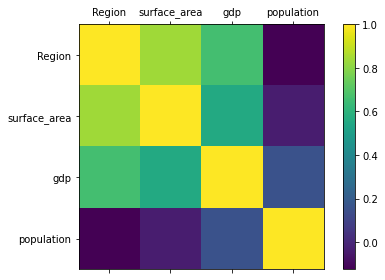

In [200]:
# Select columns
cols = un_data.columns

# Make subplot and figure
fig, ax = plt.subplots(1, 1)

# Generate correlation matrix
corr_data = un_data.corr()

# Generate matplotlib plot
cax = ax.matshow(corr_data) 

# Add colorbar to figure
fig.colorbar(cax)

# Set tick labels
ax.set_xticklabels(cols)
ax.set_yticklabels(cols)

fig.tight_layout()